In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [2]:
filename = r'C:\Users\Luis\Downloads\529942_1182360_bundle_archive\sars_2003_complete_dataset_clean.csv'
df = pd.read_csv(filename)

In [3]:
parse_dates = ['Date']

In [4]:
df.head()

,Date,Country,Cumulative number of case(s),Number of deaths,Number recovered
0,2003-03-17,Germany,1,0,0
1,2003-03-17,Canada,8,2,0
2,2003-03-17,Singapore,20,0,0
3,2003-03-17,"Hong Kong SAR, China",95,1,0
4,2003-03-17,Switzerland,2,0,0


In [5]:
df.columns

Index(['Date', 'Country', 'Cumulative number of case(s)', 'Number of deaths',
       'Number recovered'],
      dtype='object')

### DETALHES DA COLUNA

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2538 entries, 0 to 2537
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Date                          2538 non-null   object
 1   Country                       2538 non-null   object
 2   Cumulative number of case(s)  2538 non-null   int64 
 3   Number of deaths              2538 non-null   int64 
 4   Number recovered              2538 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 79.4+ KB


In [7]:
df.describe(include = 'object')

,Date,Country
count,2538,2538
unique,96,37
top,2003-06-26,Canada
freq,32,96


### DATA DAS INFORMAÇÕES

### 17/03/2003 - 11/07/2003

In [8]:
a = df.Date.value_counts().sort_index()
print('Primeira Data:',a.index[0])
print('Última Data:',a.index[-1])

Primeira Data: 2003-03-17
Última Data: 2003-07-11


In [9]:
df.isnull().sum()

Date                            0
Country                         0
Cumulative number of case(s)    0
Number of deaths                0
Number recovered                0
dtype: int64

### RENOMEANDO COLUNAS PARA MANIPULAR OS DADOS MAIS FÁCILMENTE

In [10]:
df.rename(columns={'Date': 'date',
                     'Country':'country',
                     'Cumulative number of case(s)':'cumulativeCases',
                     'Number of deaths': 'deaths',
                     'Number recovered':'recovered'
                    }, inplace=True)

### CASOS CONFIRMADOS AO LONGO DO TEMPO

[Text(0, 0.5, 'Total de casos'), Text(0.5, 0, 'Datas')]

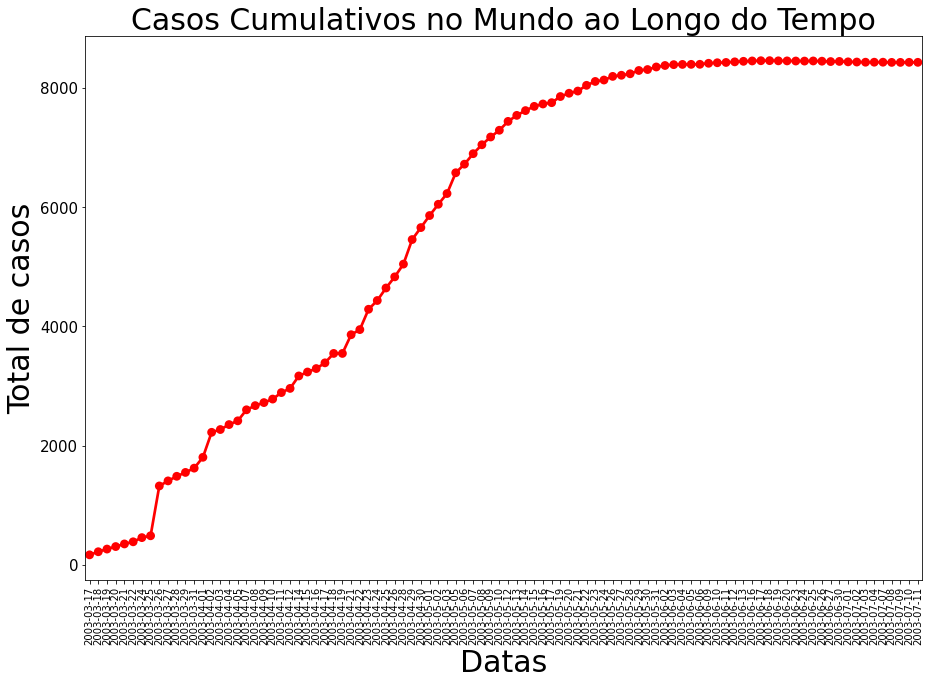

In [11]:
plt.figure(figsize= (15,10))
plt.xticks(rotation = 90 ,fontsize = 10)
plt.yticks(fontsize = 15)
plt.xlabel("Datas",fontsize = 30)
plt.ylabel('Total de casos',fontsize = 30)
plt.title("Casos Cumulativos no Mundo ao Longo do Tempo" , fontsize = 30)
total_cases = df.groupby('date')['date', 'cumulativeCases'].sum().reset_index()
total_cases['date'] = pd.to_datetime(total_cases['date'])


ax = sns.pointplot( x = total_cases.date.dt.date ,y = total_cases.cumulativeCases , color = 'r')
ax.set(xlabel='Datas', ylabel='Total de casos')

### 10 PAÍSES COM MAIS CASOS

In [12]:
top = df[df['date'] == df['date'].max()]
top_casualities = top.groupby(by = 'country')['cumulativeCases'].sum().sort_values(ascending = False).head(10).reset_index()
top_casualities

,country,cumulativeCases
0,China,5327
1,"Hong Kong SAR, China",1755
2,"Taiwan, China",671
3,Canada,250
4,Singapore,206
5,United States,75
6,Viet Nam,63
7,Philippines,14
8,Germany,10
9,Thailand,9


[Text(0, 0.5, 'País'), Text(0.5, 0, 'Total de casos')]

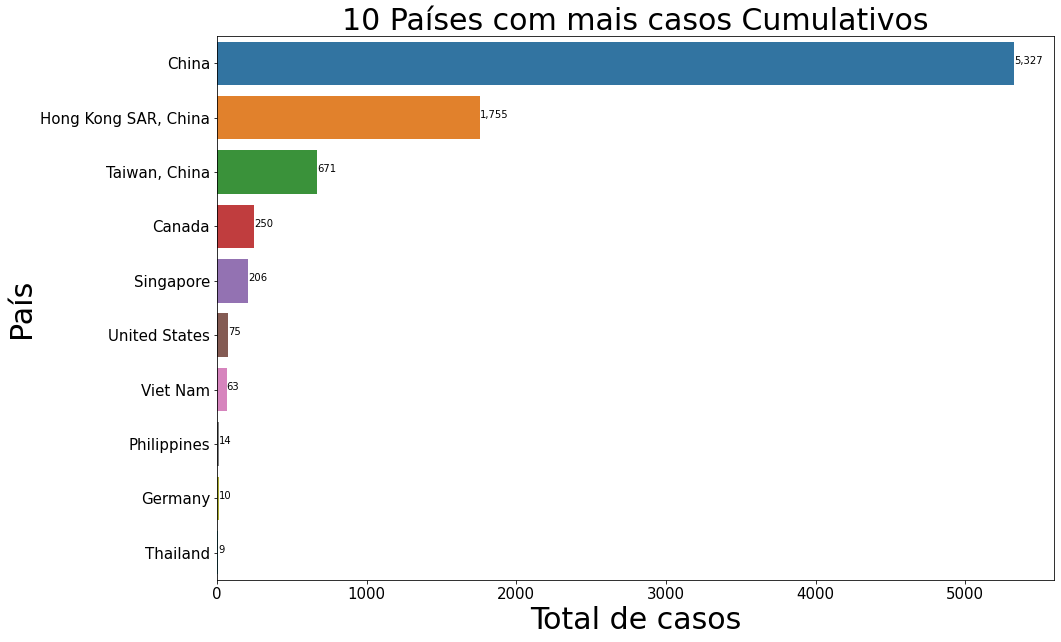

In [13]:
plt.figure(figsize= (15,10))
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("Total de casos",fontsize = 30)
plt.ylabel('País',fontsize = 30)
plt.title("10 Países com mais casos Cumulativos" , fontsize = 30)
ax = sns.barplot(x = top_casualities.cumulativeCases, y = top_casualities.country)
for i, (value, name) in enumerate(zip(top_casualities.cumulativeCases,top_casualities.country)):
    ax.text(value, i-.05, f'{value:,.0f}',  size=10, ha='left',  va='center')
ax.set(xlabel='Total de casos', ylabel='País')

### 10 PAÍSES COM MAIS MORTES

In [14]:
top_deaths = top.groupby(by = 'country')['deaths'].sum().sort_values(ascending = False).head(10).reset_index()
top_deaths

,country,deaths
0,China,348
1,"Hong Kong SAR, China",298
2,"Taiwan, China",84
3,Canada,38
4,Singapore,32
5,Viet Nam,5
6,Thailand,2
7,Philippines,2
8,Malaysia,2
9,South Africa,1


[Text(0, 0.5, 'País'), Text(0.5, 0, 'Total de casos')]

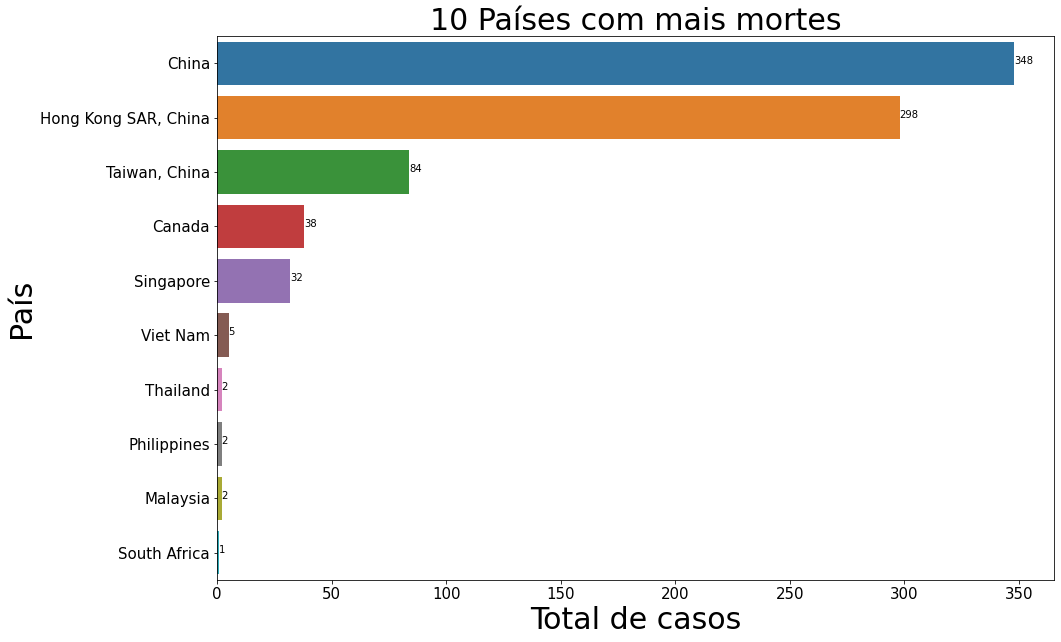

In [15]:
plt.figure(figsize= (15,10))
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("Total de casos",fontsize = 30)
plt.ylabel('País',fontsize = 30)
plt.title("10 Países com mais mortes" , fontsize = 30)
ax = sns.barplot(x = top_deaths.deaths, y = top_deaths.country)
for i, (value, name) in enumerate(zip(top_deaths.deaths,top_deaths.country)):
    ax.text(value, i-.05, f'{value:,.0f}',  size=10, ha='left',  va='center')
ax.set(xlabel='Total de casos', ylabel='País')

### 10 PAÍSES COM MAIS RECUPERADOS

In [16]:
top_recovered = top.groupby(by = 'country')['recovered'].sum().sort_values(ascending = False).head(10).reset_index()
top_recovered

,country,recovered
0,China,4941
1,"Hong Kong SAR, China",1433
2,"Taiwan, China",507
3,Canada,194
4,Singapore,172
5,United States,67
6,Viet Nam,58
7,Philippines,12
8,Germany,9
9,Mongolia,9


[Text(0, 0.5, 'País'), Text(0.5, 0, 'Total de casos')]

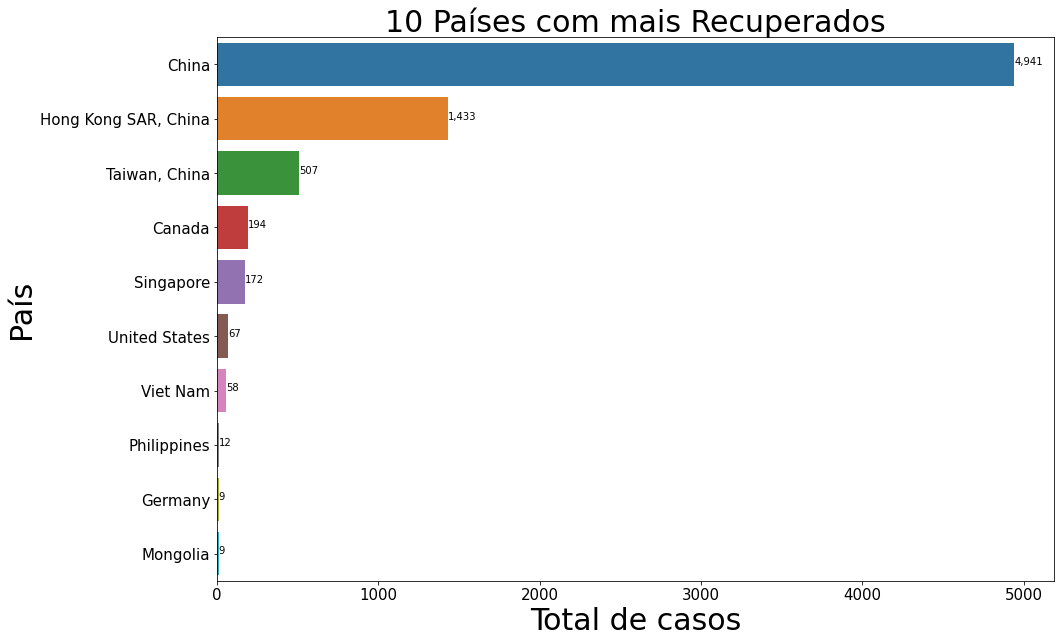

In [17]:
plt.figure(figsize= (15,10))
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("Total de casos",fontsize = 30)
plt.ylabel('País',fontsize = 30)
plt.title("10 Países com mais Recuperados" , fontsize = 30)
ax = sns.barplot(x = top_recovered.recovered, y = top_recovered.country)
for i, (value, name) in enumerate(zip(top_recovered.recovered,top_recovered.country)):
    ax.text(value, i-.05, f'{value:,.0f}',  size=10, ha='left',  va='center')
ax.set(xlabel='Total de casos', ylabel='País')

### 10 PAÍSES COM A PIOR MORTALIDADE E A MELHOR TAXA DE RECUPERAÇÃO

In [18]:
rate = top.groupby(by = 'country')['recovered','cumulativeCases','deaths'].sum().reset_index()
rate['recovery percentage'] =  round(((rate['recovered']) / (rate['cumulativeCases'])) * 100 , 2)
rate['death percentage'] =  round(((rate['deaths']) / (rate['cumulativeCases'])) * 100 , 2)
rate.head()

,country,recovered,cumulativeCases,deaths,recovery percentage,death percentage
0,Brazil,1,1,0,100.00,0.00
1,Canada,194,250,38,77.60,15.20
2,China,4941,5327,348,92.75,6.53
3,Colombia,1,1,0,100.00,0.00
4,Finland,1,1,0,100.00,0.00


In [19]:
mortality = rate.groupby(by = 'country')['death percentage'].sum().sort_values(ascending = False).head(10).reset_index()
mortality

,country,death percentage
0,South Africa,100.00
1,Malaysia,40.00
2,Thailand,22.22
3,"Hong Kong SAR, China",16.98
4,Singapore,15.53
5,Canada,15.20
6,France,14.29
7,Philippines,14.29
8,"Taiwan, China",12.52
9,Viet Nam,7.94


[Text(0, 0.5, 'País'), Text(0.5, 0, 'Taxa de Mortalidade por Porcentagem')]

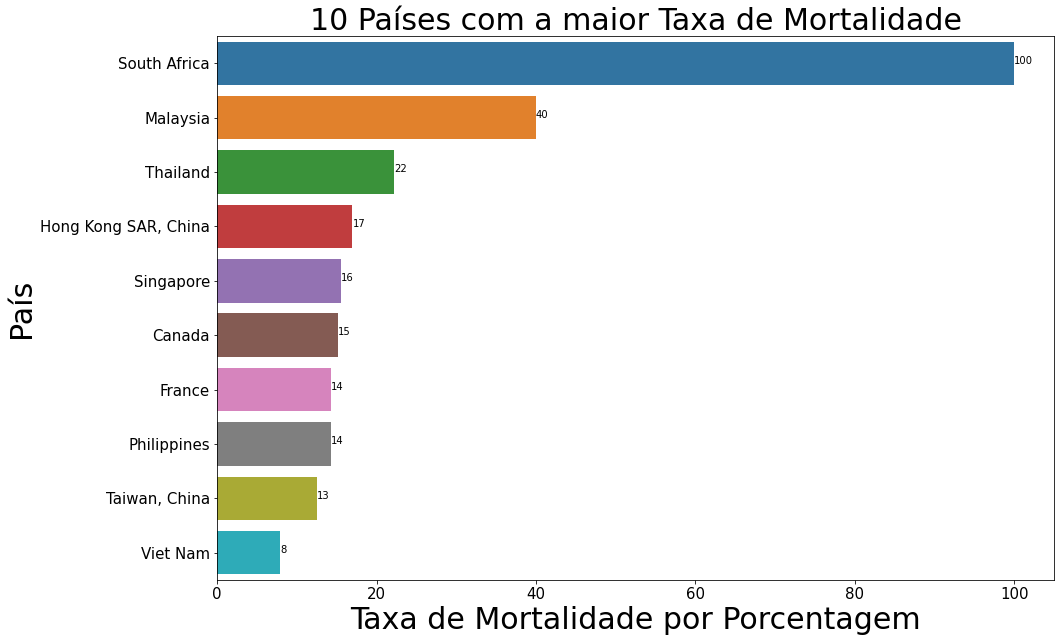

In [20]:
plt.figure(figsize= (15,10))
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("Total de casos",fontsize = 30)
plt.ylabel('País',fontsize = 30)
plt.title("10 Países com a maior Taxa de Mortalidade" , fontsize = 30)
ax = sns.barplot(x = mortality['death percentage'], y = mortality.country)
for i, (value, name) in enumerate(zip(mortality['death percentage'], mortality.country)):
    ax.text(value, i-.05, f'{value:,.0f}',  size=10, ha='left',  va='center')
ax.set(xlabel='Taxa de Mortalidade por Porcentagem', ylabel='País')

In [21]:
recovery = rate.groupby(by = 'country')['recovery percentage'].sum().sort_values(ascending = False).head(10).reset_index()
recovery

,country,recovery percentage
0,New Zealand,100.0
1,Republic of Korea,100.0
2,Colombia,100.0
3,Finland,100.0
4,India,100.0
5,Indonesia,100.0
6,Italy,100.0
7,Kuwait,100.0
8,"Macao SAR, China",100.0
9,Mongolia,100.0


[Text(0, 0.5, 'País'), Text(0.5, 0, 'Taxa de Recuperação por Porcentagem')]

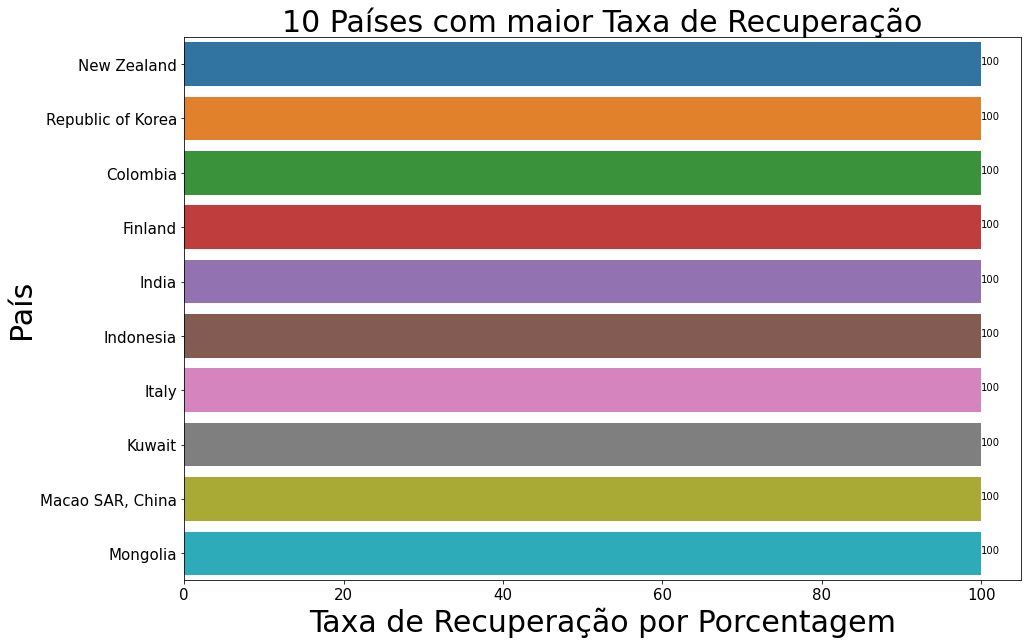

In [22]:
plt.figure(figsize= (15,10))
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("Total de casos",fontsize = 30)
plt.ylabel('País',fontsize = 30)
plt.title("10 Países com maior Taxa de Recuperação" , fontsize = 30)
ax = sns.barplot(x = recovery['recovery percentage'], y = recovery.country)
for i, (value, name) in enumerate(zip(recovery['recovery percentage'], recovery.country)):
    ax.text(value, i-.05, f'{value:,.0f}',  size=10, ha='left',  va='center')
ax.set(xlabel='Taxa de Recuperação por Porcentagem', ylabel='País')